In [1]:
# Conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Concentracion AI/Modulo 2 Arq de Deep Learning/Entregable"

Mounted at /content/drive
/content/drive/MyDrive/Concentracion AI/Modulo 2 Arq de Deep Learning/Entregable


In [2]:
# Importar la libreria
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [8]:
# Data generators
base_dir = 'Flowers'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 20,
							class_mode ='sparse')

val_datagen = ImageDataGenerator(1./255)

val_generator = val_datagen.flow_from_directory(
					validation_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'sparse')

test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
							test_dir,
							target_size = (150, 150),
							batch_size = 20,
							class_mode ='sparse')


Found 2230 images belonging to 5 classes.
Found 485 images belonging to 5 classes.
Found 459 images belonging to 5 classes.


In [9]:
class_labels = train_generator.class_indices
class_labels

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## Modelo 1

In [10]:
# Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, kernel_size=3, padding='same', strides = 2, activation="relu", input_shape=(150,150,3)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(5, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 5)                 50005     
                                                                 
Total params: 50453 (197.08 KB)
Trainable params: 50453 (197.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [14]:
# Entrenamiento
history = model.fit(train_generator,
				steps_per_epoch = 10,
				epochs = 50,
				validation_data = val_generator,
				validation_steps = 5
        )

Epoch 1/50
10/10 [==============================] - 94s 10s/step - loss: 7.6419 - accuracy: 0.3350 - val_loss: 5.9673 - val_accuracy: 0.4100
Epoch 2/50
10/10 [==============================] - 81s 8s/step - loss: 6.8236 - accuracy: 0.3053 - val_loss: 7.2210 - val_accuracy: 0.3100
Epoch 3/50
10/10 [==============================] - 74s 8s/step - loss: 3.6665 - accuracy: 0.4650 - val_loss: 5.1279 - val_accuracy: 0.2300
Epoch 4/50
10/10 [==============================] - 55s 6s/step - loss: 4.0189 - accuracy: 0.4400 - val_loss: 4.8166 - val_accuracy: 0.3300
Epoch 5/50
10/10 [==============================] - 47s 5s/step - loss: 3.3838 - accuracy: 0.4211 - val_loss: 3.9644 - val_accuracy: 0.3600
Epoch 6/50
10/10 [==============================] - 38s 4s/step - loss: 2.4400 - accuracy: 0.4700 - val_loss: 3.8974 - val_accuracy: 0.3000
Epoch 7/50
10/10 [==============================] - 34s 4s/step - loss: 2.5796 - accuracy: 0.4550 - val_loss: 4.0504 - val_accuracy: 0.3100
Epoch 8/50
10/10 [=

In [16]:
df = pd.DataFrame(history.history)

<Axes: title={'center': 'Loss vs Epoch'}>

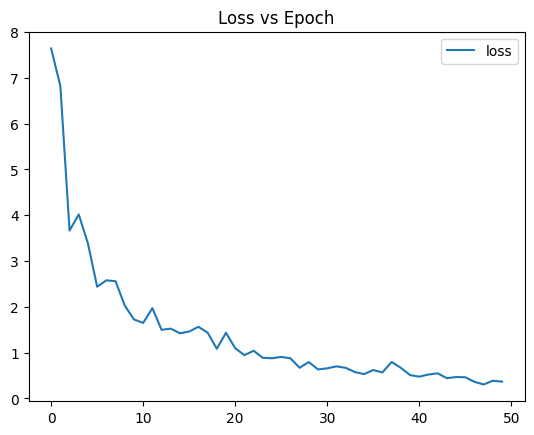

In [17]:
# Gráfica de Loss vs Epoch
df.plot( y = "loss", title = "Loss vs Epoch")

<Axes: title={'center': 'accuracy vs Epoch'}>

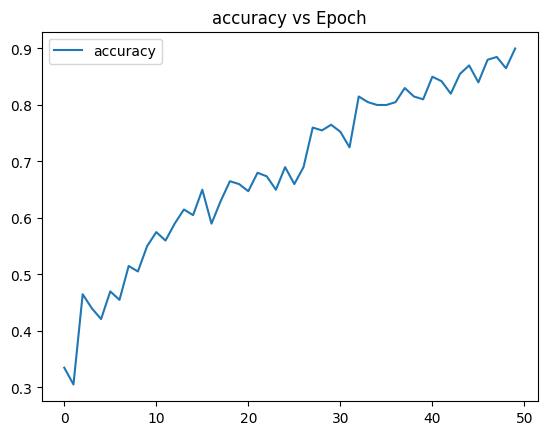

In [18]:
# Gráfica de Accuracy vs Epoch
df.plot( y = "accuracy", title = "accuracy vs Epoch")

In [19]:
# Prueba con los datos de test
test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\ntest acc :\n', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


10/10 [==============================] - 57s 6s/step - loss: 2.8985 - accuracy: 0.4400

test acc :
 0.4399999976158142


## Modelo 2

Se agregaron capas densas y se modificó el Max Pooling

In [20]:
# Sequential convolutional neural network model
model2 =  Sequential([
    Conv2D(8, kernel_size=3, padding='same', activation="relu", input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
 ])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 8)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 45000)             0         
                                                                 
 dense_1 (Dense)             (None, 64)                2880064   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                      

In [23]:
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [24]:
# Entrenamiento
history2 = model2.fit(train_generator,
				steps_per_epoch = 10,
				epochs = 60,
				validation_data = val_generator,
				validation_steps = 5)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


10/10 [==============================] - 6s 395ms/step - loss: 465.7367 - accuracy: 0.3000 - val_loss: 60.5941 - val_accuracy: 0.2300
Epoch 2/60
10/10 [==============================] - 4s 427ms/step - loss: 61.3330 - accuracy: 0.2600 - val_loss: 102.9319 - val_accuracy: 0.2500
Epoch 3/60
10/10 [==============================] - 4s 451ms/step - loss: 70.1592 - accuracy: 0.2850 - val_loss: 117.3535 - val_accuracy: 0.1600
Epoch 4/60
10/10 [==============================] - 4s 355ms/step - loss: 62.1981 - accuracy: 0.3000 - val_loss: 20.2074 - val_accuracy: 0.3100
Epoch 5/60
10/10 [==============================] - 4s 384ms/step - loss: 21.2879 - accuracy: 0.3150 - val_loss: 17.3522 - val_accuracy: 0.3700
Epoch 6/60
10/10 [==============================] - 3s 301ms/step - loss: 12.6173 - accuracy: 0.3895 - val_loss: 18.9288 - val_accuracy: 0.2700
Epoch 7/60
10/10 [==============================] - 4s 382ms/step - loss: 10.2914 - accuracy: 0.4300 - val_loss: 8.3539 - val_accuracy: 0.4000
E

In [26]:
# Se guarda el modelo
model2.save('flowers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
# Prueba con los datos de test
test_loss, test_acc = model2.evaluate(test_generator, steps = 20)
print('\ntest acc :\n', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


20/20 [==============================] - 62s 3s/step - loss: 2.8884 - accuracy: 0.5225

test acc :
 0.5224999785423279
